# pokingTailFindrOutputs.ipynb
## Marcus Viscardi,    November 07, 2022

First couple steps of looking at tailfindr called reads after a full reinstall of the tailfindr library seemed to fix stuff

In [4]:
import numpy as np
import pandas as pd
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', None)
import seaborn as sea
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from tqdm import tqdm
print("imports done.")

imports done.


In [5]:
tail_df: pd.DataFrame = pd.read_parquet("./221107_tailfindrOutput.parquet")
assignment_df: pd.DataFrame = pd.read_parquet("/data16/marcus/scripts/nanoporePipelineScripts/standardsAlignment/221107_expanded_221031_RNAStds_Nano3P_Assignments.parquet")

In [6]:
merge_df = tail_df.merge(assignment_df, how="left", on="read_id")
merge_df

,read_id,read_type,tail_start,tail_end,samples_per_nt,tail_length,file_path,assignment,sequence,q_st,q_en,strand,ctg,ctg_len,r_st,r_en,mlen,blen,mapq,tp,ts,cigar,cleaned_cigar,perfect_barcode
0,d804cfd8-dc77-4e20-a0f1-58711771d59b,no_adaptor_found,NaN,NaN,7.85,NaN,/data16/marcus/working/221028_nanoporeRun_ENO2...,60,CATGCTTCGTTCAGTTACGTACTCTTCCCGTTCACTTGCCTGTCGC...,104.0,736.0,-,ENO2_finalStandard_60Tail,662,17.0,662.0,584,650,35,tp:A:P,ts:A:.,cg:Z:35M1D11M2D72M4D7M4I1M1I12M2D145M1I10M1D16...,35M1D11M2D72M4D7M4I1M1I12M2D145M1I10M1D16M2I5M...,True
1,4c748be6-ecc7-4936-a356-b5b6fff8e77a,contains_a_polyT_tail,1050.0,1490.0,7.85,56.03,/data16/marcus/working/221028_nanoporeRun_ENO2...,60,AGTATGCTTCGTTCAGTTACGTATTTATCACTTGCCTGTCGCTCTA...,93.0,325.0,-,ENO2_finalStandard_60Tail,662,431.0,662.0,216,225,60,tp:A:P,ts:A:.,cg:Z:32M1I24M1I128M1D46M,32M1I24M1I128M1D46M,True
2,e7f2aec7-dd18-4509-a489-7de1d9ddda71,contains_a_polyT_tail,1180.0,1280.0,7.26,13.77,/data16/marcus/working/221028_nanoporeRun_ENO2...,Ambiguous_All,AAAAAAAAAAAGCTAAACGCGTTCAGTTACGTATTGCTCTTCCGAT...,NaN,NaN,<NA>,<NA>,<NA>,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,None
3,740e9639-c302-4264-a79a-ec33e4a85132,contains_no_polyT_tail,NaN,NaN,8.71,0.00,/data16/marcus/working/221028_nanoporeRun_ENO2...,Ambiguous_All,ATTGTACTTCGTTCAGTTACGTATTGCTCTTCCGATCACTTGCCTG...,NaN,NaN,<NA>,<NA>,<NA>,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,None
4,ad70ff1f-92c1-427f-b0f0-0051b9c5ceff,contains_a_polyT_tail,1950.0,2080.0,7.70,16.89,/data16/marcus/working/221028_nanoporeRun_ENO2...,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361567,d72f6737-ea5e-4868-a31a-48a44f4a3899,qc_failed,NaN,NaN,7.59,NaN,/data16/marcus/working/221028_nanoporeRun_ENO2...,15,TTGTACTTCGTTCAGTTACGTATTGCTCTTCCGATCACTTACCTGT...,86.0,691.0,-,ENO2_finalStandard_15Tail,662,29.0,662.0,588,625,16,tp:A:P,ts:A:.,cg:Z:32M3D71M7D39M12D25M1D277M1D78M2D57M2D26M,32M3D71M7D39M12D25M1D277M1D78M2D57M2D26M,False
361568,b86cf375-ef06-4d51-a3a1-9db6d6f0b04f,contains_a_polyT_tail,580.0,680.0,7.26,13.77,/data16/marcus/working/221028_nanoporeRun_ENO2...,60,GTGTACTTCGTTCAGTTACGTATTGCTTTTCTTCCCGATCACTTGC...,88.0,677.0,-,ENO2_finalStandard_60Tail,662,29.0,644.0,536,618,1,tp:A:P,ts:A:.,cg:Z:11M1I46M2D1M3D12M1D3M3I24M2I5M1D47M3D35M1...,11M1I46M2D1M3D12M1D3M3I24M2I5M1D47M3D35M1I3M1D...,True
361569,f3c3575f-f632-4653-acf8-f5e4642d7b5d,contains_a_polyT_tail,650.0,690.0,7.44,5.38,/data16/marcus/working/221028_nanoporeRun_ENO2...,10,TTGTACTTCGTTCAGTTGCGTATTGCTCTTCCGATCACTTGCCTGT...,64.0,629.0,-,ENO2_finalStandard_10Tail,662,71.0,659.0,523,587,8,tp:A:P,ts:A:.,cg:Z:12M1I13M1D3M5D2M1D86M2D4M2D5M1I11M3D3M2I7...,12M1I13M1D3M5D2M1D86M2D4M2D5M1I11M3D3M2I7M3D34...,False
361570,3d982884-e1db-4667-90f1-f37d97765cea,contains_a_polyT_tail,1025.0,1185.0,8.11,19.72,/data16/marcus/working/221028_nanoporeRun_ENO2...,60,AGTGTACTTCGTTCAGTTACGTATTGCTCTTTCGATCACTTGCCTG...,74.0,342.0,-,ENO2_finalStandard_60Tail,662,377.0,662.0,245,279,60,tp:A:P,ts:A:.,cg:Z:90M1I43M1D18M1D55M2D6M1D8M14D9M1I37M,90M1I43M1D18M1D55M2D6M1D8M14D9M1I37M,True


In [7]:
merge_df['mapped_to_end'] = merge_df['r_en'] >= 661  # This allows for a single nucl of "wiggle room"
mini_merge_df = merge_df[['read_id', 'read_type', 'tail_length', 'assignment', 'sequence', 'perfect_barcode', 'mapped_to_end']]
mini_merge_df

,read_id,read_type,tail_length,assignment,sequence,perfect_barcode,mapped_to_end
0,d804cfd8-dc77-4e20-a0f1-58711771d59b,no_adaptor_found,NaN,60,CATGCTTCGTTCAGTTACGTACTCTTCCCGTTCACTTGCCTGTCGC...,True,True
1,4c748be6-ecc7-4936-a356-b5b6fff8e77a,contains_a_polyT_tail,56.03,60,AGTATGCTTCGTTCAGTTACGTATTTATCACTTGCCTGTCGCTCTA...,True,True
2,e7f2aec7-dd18-4509-a489-7de1d9ddda71,contains_a_polyT_tail,13.77,Ambiguous_All,AAAAAAAAAAAGCTAAACGCGTTCAGTTACGTATTGCTCTTCCGAT...,None,False
3,740e9639-c302-4264-a79a-ec33e4a85132,contains_no_polyT_tail,0.00,Ambiguous_All,ATTGTACTTCGTTCAGTTACGTATTGCTCTTCCGATCACTTGCCTG...,None,False
4,ad70ff1f-92c1-427f-b0f0-0051b9c5ceff,contains_a_polyT_tail,16.89,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...
361567,d72f6737-ea5e-4868-a31a-48a44f4a3899,qc_failed,NaN,15,TTGTACTTCGTTCAGTTACGTATTGCTCTTCCGATCACTTACCTGT...,False,True
361568,b86cf375-ef06-4d51-a3a1-9db6d6f0b04f,contains_a_polyT_tail,13.77,60,GTGTACTTCGTTCAGTTACGTATTGCTTTTCTTCCCGATCACTTGC...,True,False
361569,f3c3575f-f632-4653-acf8-f5e4642d7b5d,contains_a_polyT_tail,5.38,10,TTGTACTTCGTTCAGTTGCGTATTGCTCTTCCGATCACTTGCCTGT...,False,False
361570,3d982884-e1db-4667-90f1-f37d97765cea,contains_a_polyT_tail,19.72,60,AGTGTACTTCGTTCAGTTACGTATTGCTCTTTCGATCACTTGCCTG...,True,True


In [8]:
plot_df = mini_merge_df.dropna(axis=0).sort_values("assignment")
fig = px.box(plot_df,  # px.box or px.violin
             x='assignment',
             y='tail_length',
             # color='perfect_barcode',
             # color='read_type',
             color='mapped_to_end',
             # points='all',
             # points='outliers',
             hover_data=['read_type',
                         'perfect_barcode'],
             category_orders={"assignment": ['00', '05', '10', '15', '30', '60']},
             #facet_col="perfect_barcode",
             #facet_row="read_type",
             template="plotly_white",
             log_y=True,
             )
# fig.update_yaxes(type='log')
# fig.update_traces(spanmode='hard',
#                   box_visible=True,
#                   meanline_visible=True,
#                   # width=1,
#                   )
for i, assignment in enumerate(['00', '05', '10', '15', '30', '60']):
    # number_tail_called = plot_df.query(f"assignment == '{assignment}'").query(f"read_type == 'contains_a_polyT_tail'").shape[0]
    # number_tail_failed = plot_df.query(f"assignment == '{assignment}'").query(f"read_type == 'contains_no_polyT_tail'").shape[0]
    # fig.add_annotation(xref="x", x=i,
    #                    yref="paper", y=0.005,
    #                    text=f"Tailed n={number_tail_called}<br>Untailed n={number_tail_failed}",
    #                    showarrow=False)
    expected_length = int(assignment)
    fig.add_annotation()
fig.show(renderer='firefox')
# fig.write_html("Nano3P-Seq_Tails.violin.html")

In [9]:
merge_df_groupby = merge_df.groupby("assignment")
assignment_group_df = merge_df_groupby['tail_length'].mean().to_frame(name="tail_length_mean")
assignment_group_df['number_of_hits'] = merge_df_groupby['assignment'].count().to_frame()
assignment_group_df['perfect_barcode_ratio'] = merge_df_groupby['perfect_barcode'].mean().to_frame()
assignment_group_df['mapped_to_end_ratio'] = merge_df_groupby['mapped_to_end'].mean().to_frame()
assignment_group_df

,tail_length_mean,number_of_hits,perfect_barcode_ratio,mapped_to_end_ratio
assignment,,,,
00,4.246440,5176,0.651275,0.420015
05,1.452535,29534,0.462484,0.592233
10,16.049361,48864,0.783460,0.593382
15,18.642976,55079,0.623868,0.627481
30,13.485882,451,0.000000,0.461197
60,56.719591,69764,0.752824,0.583123
Ambiguous_All,7.521260,35171,NaN,0.000000
Ambiguous_subset_00_05,6.085000,37,NaN,0.000000
Ambiguous_subset_00_05_10,8.955000,4,NaN,0.000000


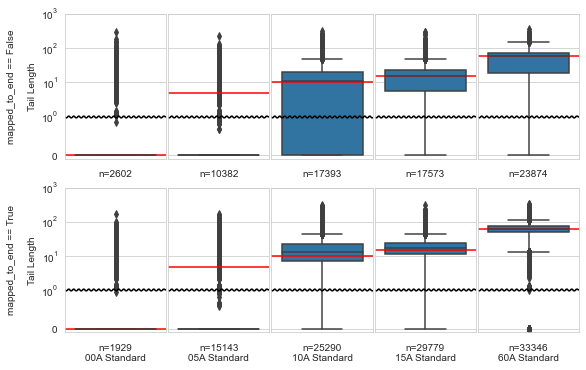

In [10]:
column_variable = "assignment"
row_variable = "mapped_to_end" # "perfect_barcode" or "mapped_to_end"
threshold = 1
sea.set_style("whitegrid")

plot_df = mini_merge_df.dropna(axis=0).sort_values("assignment").query('assignment != "30"')

n_rows = plot_df[row_variable].unique().shape[0]
n_cols = plot_df[column_variable].unique().shape[0]

fig, axes = plt.subplots(n_rows, n_cols, figsize=[8, 5], sharey='all')

for row_i, row in enumerate(axes):
    for i, assignment in enumerate(plot_df[column_variable].unique()):
        ax = row[i]
        subplot_df = plot_df.query(f'{column_variable} == "{assignment}"').query(f'{row_variable} == {row_i}')
        sea.boxplot(ax=ax,
                    data=subplot_df,
                    x='assignment', y='tail_length',
                    )
        ax.set_yscale("symlog",
                      linthresh=threshold,
                      )
        ax.set_ylim(-threshold/10, 1000)
        ax.yaxis.grid(which='minor')
        ax.axhline(int(assignment), color='r')
        with mpl.rc_context({'path.sketch': (1, 5, 1)}):
            ax.axhline(threshold, color='k')
        if i == 0:
            # ax.set_ylabel(f"Mapped to 'PolyA Site' = {bool(row_i)}\n\nTail Length")
            ax.set_ylabel(f"{row_variable} == {bool(row_i)}\n\nTail Length")

        else:
            ax.set_ylabel("")
        
        ax.set_xticklabels("")
        if row_i == 1:
            ax.set_xlabel(f"n={subplot_df.shape[0]}\n{assignment}A Standard")
        else:
            ax.set_xlabel(f"n={subplot_df.shape[0]}")

padding = 0.2
plt.tight_layout(pad=padding,
                 h_pad=padding, w_pad=padding,
                 )
plt.savefig("boxplot.png")

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3543: UserWarning:

38.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3543: UserWarning:

20.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



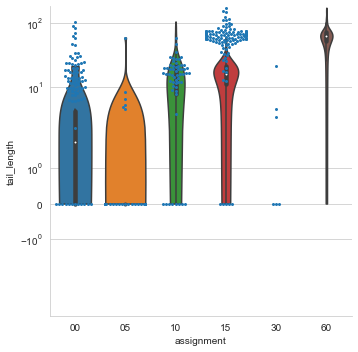

In [11]:
plot_df_subset = plot_df.sample(500).query("mapped_to_end")
g = sea.catplot(data=plot_df_subset,
                x='assignment', y='tail_length',
                #col='mapped_to_end',
                order=['00', '05', '10', '15', '30', '60'],
                kind="violin",
                cut=0,
                # split=True,
                )
sea.swarmplot(data=plot_df_subset, x='assignment', y='tail_length',
              size=3)
g.set(yscale="symlog")

In [12]:
import h5py
def list_of_read_ids_to_new_fast5(_merge_df, list_of_read_ids, new_fast5_path):
    with  h5py.File(new_fast5_path, 'w-') as output_fast5:
        for _read_id in tqdm(list_of_read_ids, desc="Reading and writing read_ids to new file"):
            _read_info_series = _merge_df.loc[_merge_df['read_id'] == _read_id, :].reset_index(drop=True).iloc[0, :]
            _fast5_file_path = _read_info_series['file_path']
            h5py.File(_fast5_file_path, 'r').copy(f"read_{_read_id}", output_fast5)
    print("Done.")

In [13]:
# Plan is to feed a ~big list of read_ids to this method, then recalling tailfindr on those so that they can make the plots!!
list_of_read_ids_to_new_fast5(merge_df, ['26b4deaa-d40e-4a4d-8067-75e478d91066'], "test_h5py_copy.fast5")

FileExistsError: [Errno 17] Unable to create file (unable to open file: name = 'test_h5py_copy.fast5', errno = 17, error message = 'File exists', flags = 15, o_flags = c2)

In [14]:
plot_df["assignment"].unique().shape[0]

5

In [15]:
plot_df

,read_id,read_type,tail_length,assignment,sequence,perfect_barcode,mapped_to_end
163459,21cbfdc3-198b-4deb-95c7-1b7b89fbef81,contains_no_polyT_tail,0.00,00,GTGTACTTCGTTCAGTTACGTATTGCTCTTCCGATCACTTGCCTGT...,True,False
162634,ec8ca37f-2060-4ee4-a806-0b4fb2de99e9,contains_no_polyT_tail,0.00,00,GGTAGCCGCTACGTTCGTTACGTATTGCTCTTCCGATCGCACTTTT...,True,False
77269,b01094c7-fac9-432f-8851-f14d1ab8a5a9,contains_no_polyT_tail,0.00,00,TTGTACTTCGTTCAGTTACGTATTGCTCTTCCGATCACTTGCCTGT...,True,True
39948,9a90ef6e-20d8-4abd-900f-f6a828e4b686,contains_a_polyT_tail,1.26,00,ATTGTACTTCGTTCGGTTACGTATTGCTCTTCCGATCACTTGCCTG...,True,False
214806,fbddfd7a-6221-4aa8-a0e1-bcf39811801d,contains_a_polyT_tail,16.48,00,ATTGTACTTCGTTCAGTTACGTATTGCTCTTCCGATCCGCTTGCCT...,False,False
...,...,...,...,...,...,...,...
166012,b2ccb14b-68d1-4727-b87f-69cf0ad21e0e,contains_a_polyT_tail,29.97,60,TTGTACTTCGTTCAGTTGTGTGCTCTTGGTCGCTTTACTGTCGCTC...,False,False
166002,e19d1c8c-1271-44c9-a0dd-389a4dbb988b,contains_a_polyT_tail,73.30,60,TTGTACTTCGTTCAGTTGCGTATTGCTCTTCCGATCACTTGCCTGT...,True,False
166000,93dcd132-0da7-4c41-b960-8cbb73078aba,contains_no_polyT_tail,0.00,60,TTGTACTTCGTTCAGTTACGTATTACTCTTCCGATCACCTGTCGCT...,True,True
166044,447791f2-4c9c-4ab6-978c-54060e36aa51,contains_a_polyT_tail,64.12,60,TGTACTTCGTTCAGTTACCTTCTTCCGATCACTTGCCTGTCGCTCT...,True,True


/tmp/ipykernel_1857838/2312995346.py:35: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_1857838/2312995346.py:35: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_1857838/2312995346.py:35: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_1857838/2312995346.py:35: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_1857838/2312995346.py:35: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_1857838/2312995346.py:35: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_1857838/2312995346.py:35: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_1857838/2312995346.py:35: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_1857838/2312995346.py:35: UserWarning:

F

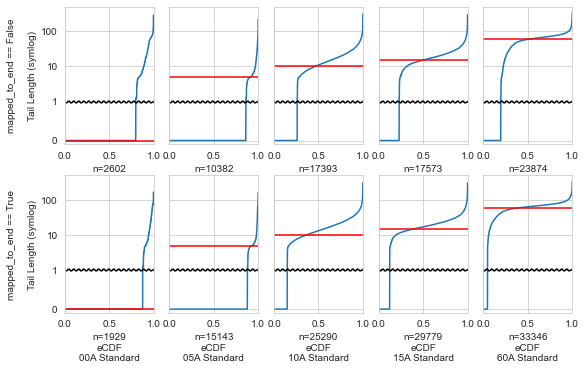

In [43]:
column_variable = "assignment"
row_variable = "mapped_to_end" # "perfect_barcode" or "mapped_to_end"
threshold = 1
sea.set_style("whitegrid")

plot_df = mini_merge_df.dropna(axis=0).sort_values("assignment").query('assignment != "30"')

n_rows = plot_df[row_variable].unique().shape[0]
n_cols = plot_df[column_variable].unique().shape[0]

fig, axes = plt.subplots(n_rows, n_cols, figsize=[8, 5], sharey='all')

for row_i, row in enumerate(axes):
    for i, assignment in enumerate(plot_df[column_variable].unique()):
        ax = row[i]
        subplot_df = plot_df.query(f'{column_variable} == "{assignment}"').query(f'{row_variable} == {row_i}')
        sea.ecdfplot(ax=ax,
                    data=subplot_df, y='tail_length',
                    )
        ax.set_yscale("symlog",
                      linthresh=threshold,
                      )
        ax.set_ylim(-threshold/10, 500)
        # ax.yaxis.grid(which='minor')
        ax.axhline(int(assignment), color='r')
        with mpl.rc_context({'path.sketch': (1, 5, 1)}):
            ax.axhline(threshold, color='k')
        if i == 0:
            # ax.set_ylabel(f"Mapped to 'PolyA Site' = {bool(row_i)}\n\nTail Length")
            ax.set_ylabel(f"{row_variable} == {bool(row_i)}\n\nTail Length (symlog)")

        else:
            ax.set_ylabel("")
        
        ax.set_yticklabels([0, 1, 10, 100])
        if row_i == 1:
            ax.set_xlabel(f"n={subplot_df.shape[0]}\neCDF\n{assignment}A Standard")
        else:
            ax.set_xlabel(f"n={subplot_df.shape[0]}")

padding = 0.2
plt.tight_layout(pad=padding,
                 h_pad=padding, w_pad=padding,
                 )
plt.savefig("ecdf.png")